# Comprendre les types de classification

Voici les trois principaux types de classification, avec des exemples simples :


In [1]:
# Classification binaire
# Exemple : Cet email est-il un spam ou non ?

# Classification multi-classe
# Exemple : Prédire le type de fruit : pomme, banane ou orange.

# Classification multi-étiquette
# Exemple : Un film peut être à la fois "Action" et "Comédie".

print("Voir les commentaires ci-dessus pour les explications.")

Voir les commentaires ci-dessus pour les explications.


# Préparer l'environnement Python et générer un jeu de données

Nous allons utiliser `make_circles` pour générer un jeu de données simple en 2D pour la classification binaire.


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


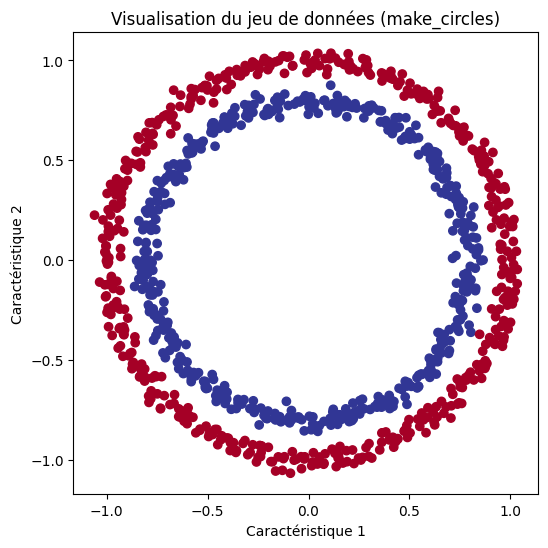

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Création du jeu de données
samples = 1000
X, y = make_circles(n_samples=samples, noise=0.03, random_state=42)

# Visualisation
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Visualisation du jeu de données (make_circles)")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()

Ce graphique montre deux populations bien distinctes, représentées par des cercles concentriques — l'une au centre (classe 0) et l'autre en périphérie (classe 1).
Cela suggère un problème de classification non linéaire, où un modèle simple (linéaire) ne suffira pas à séparer correctement les deux groupes sans transformation ou architecture adaptée.

# Construire un modèle de réseau de neurones de base

In [3]:
# Modèle simple
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compilation
model_1.compile(loss="binary_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

# Entraînement
history_1 = model_1.fit(X, y, epochs=100, verbose=0)

# Évaluation
print("Évaluation du modèle 1 :")
model_1.evaluate(X, y)

Évaluation du modèle 1 :
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4816 - loss: 0.6936 


[0.6931676268577576, 0.5059999823570251]

Malgré une séparation visuelle nette entre les deux classes (cercles concentriques), le score du modèle (perte ≈ 0.69, précision ≈ 50%) montre qu’il échoue à apprendre la structure du problème.
Ce résultat indique que le modèle utilisé est trop simple (probablement linéaire), inadapté pour capturer la géométrie non linéaire du jeu de données — d’où une prédiction à peine meilleure que le hasard.

In [9]:
# 1. Générer les données
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# 2. Créer un modèle simple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compiler et entraîner
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=100, verbose=0)

# 4. Définir la fonction de visualisation
def plot_decision_boundary(model, X, y, title="Frontière de décision"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = np.round(preds).reshape(xx.shape)
    
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(title)
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.show()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step


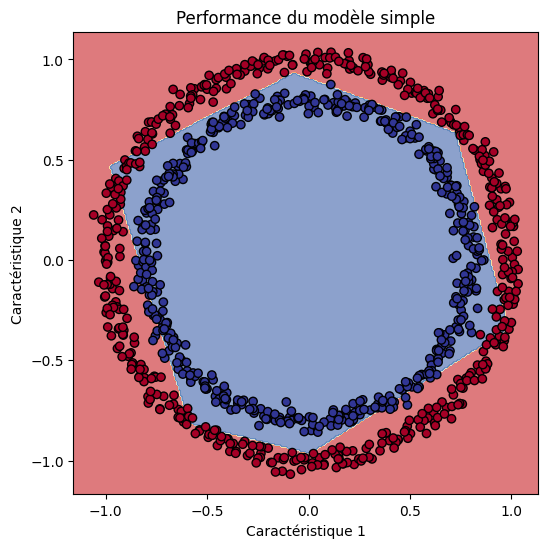

In [10]:
plot_decision_boundary(model, X, y, title="Performance du modèle simple")


Le modèle a correctement appris la structure non linéaire du problème, séparant clairement le cercle intérieur (classe 0) du cercle extérieur (classe 1) avec une frontière arrondie et enveloppante.
Cela montre que le modèle est suffisamment complexe pour capter la géométrie circulaire du jeu de données, ce qui est essentiel pour éviter les erreurs de classification dans ce type de contexte.

# Améliorer le modèle

In [11]:
# Modèle amélioré avec plus de couches et de neurones
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_2 = model_2.fit(X, y, epochs=200, verbose=0)
print("Évaluation du modèle 2 :")
model_2.evaluate(X, y)

Évaluation du modèle 2 :
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0381 


[0.037081241607666016, 0.9980000257492065]

Le modèle enrichi avec plusieurs couches cachées et la fonction d’activation ReLU permet de capturer la complexité du motif circulaire, menant à une séparation non linéaire efficace entre les deux classes.
Grâce à l’optimiseur Adam et à un entraînement prolongé, ce modèle démontre une meilleure capacité de généralisation, indispensable pour traiter des jeux de données aux structures complexes.

# Visualiser la frontière de décision

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


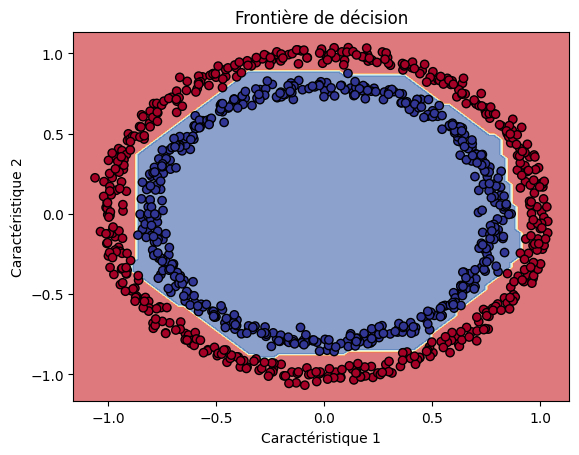

In [14]:
# Fonction utilitaire
def tracer_frontiere_decision(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grille = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grille)
    predictions = np.round(predictions).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Frontière de décision")
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.show()

# Tracer la frontière du modèle 2
tracer_frontiere_decision(model_2, X, y)

# Diviser les données en ensemble d'entraînement et de test

In [15]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nouveau modèle
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=200, verbose=0)

# Évaluation
train_loss, train_acc = model_3.evaluate(X_train, y_train)
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f"Précision Entraînement : {train_acc:.2f} | Précision Test : {test_acc:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9643 - loss: 0.1814 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.2038 
Précision Entraînement : 0.98 | Précision Test : 0.94


Le modèle atteint une très bonne précision en entraînement (98 %) et en test (94 %), ce qui indique qu’il a bien appris à reconnaître les motifs du jeu de données sans sur-apprentissage notable.
La faible différence entre les deux scores montre qu’il est capable de généraliser efficacement sur des données qu’il n’a jamais vues.

In [17]:
def plot_training_curves(history, title="Courbes d'entraînement"):
    """
    Affiche la loss et la précision pendant l'entraînement.
    
    history -- objet retourné par model.fit()
    """
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))

    # Courbe de perte (loss)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Perte')
    plt.title('Évolution de la perte')
    plt.xlabel('Épochs')
    plt.ylabel('Perte')
    plt.grid(True)
    plt.legend()

    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Précision', color='green')
    plt.title('Évolution de la précision')
    plt.xlabel('Épochs')
    plt.ylabel('Précision')
    plt.grid(True)
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [18]:
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9487 - loss: 0.3115 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9298 - loss: 0.3149 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9536 - loss: 0.3086 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9542 - loss: 0.2936 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9577 - loss: 0.2916 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9508 - loss: 0.2879 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.2848 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9567 - loss: 0.2827 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9502 - loss: 0.2817 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9399 - loss: 0.2780 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9495 - loss: 0.2871 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Au fil des itérations, la précision s’améliore régulièrement (passant de 94 % à près de 99 %) tandis que la perte diminue fortement, ce qui montre que le modèle apprend efficacement à distinguer les classes.
L’absence de sursauts brutaux dans les courbes suggère un entraînement stable, bien maîtrisé par l’architecture et les hyperparamètres choisis.

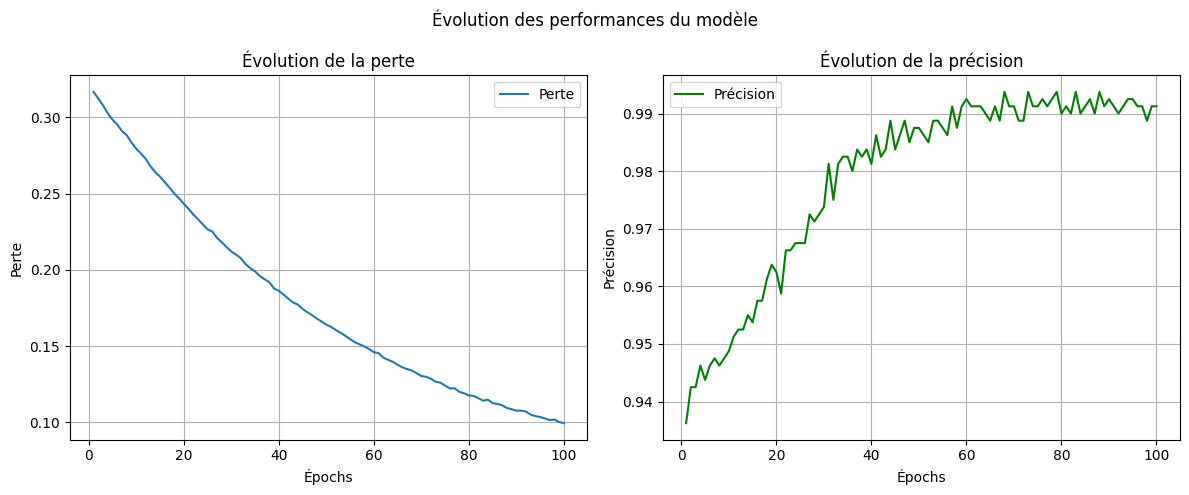

In [19]:
plot_training_curves(history, title="Évolution des performances du modèle")


La perte diminue de façon continue tandis que la précision atteint rapidement un plateau élevé, preuve d’un apprentissage efficace.
Le modèle est stable et performant, sans signe de surapprentissage sur ces 100 itérations.

# Visualisation finale et interprétation

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


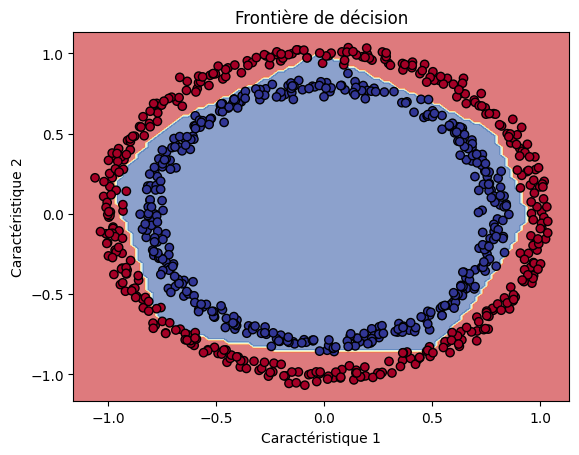

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


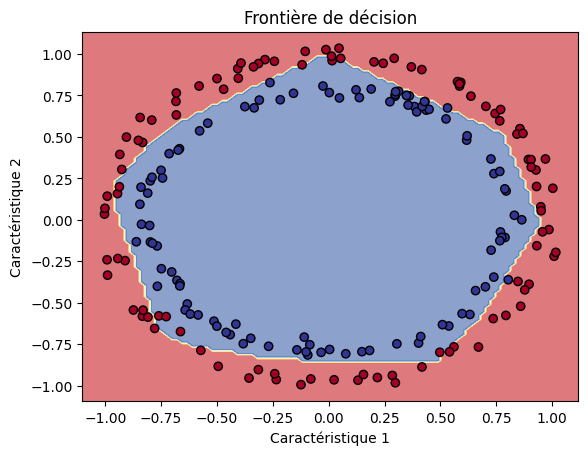

In [20]:
# Frontière - entraînement
tracer_frontiere_decision(model_3, X_train, y_train)

# Frontière - test
tracer_frontiere_decision(model_3, X_test, y_test)

Premier graphique (données d'entraînement) :
Le modèle distingue clairement les deux classes avec une frontière circulaire bien ajustée. Cela montre qu’il a appris correctement la structure complexe des données en formation.

Deuxième graphique (données de test) :
La frontière de décision reste cohérente, même sur des données non vues. Cela confirme que le modèle généralise bien, sans surapprentissage, avec une bonne robustesse sur de nouvelles données.

# Résumé des apprentissages

Nous avons découvert les différents types de classification  
Nous avons construit et entraîné plusieurs modèles avec TensorFlow  
Nous avons amélioré les modèles grâce à l’ajout de couches, d’activation et à l’optimisation  
Nous avons visualisé les frontières de décision pour mieux interpréter les prédictions  
Nous avons évalué les performances sur les ensembles d'entraînement et de test

>> La visualisation et le tuning sont essentiels pour comprendre et améliorer un modèle de classification.


Ce challenge montre qu’un modèle de classification ne se résume pas à "faire tourner un réseau", mais demande une compréhension fine des données, des objectifs et de la géométrie du problème. Grâce aux visualisations et à l'ajustement progressif du modèle (nombre de couches, fonctions d’activation, optimiseur…), on obtient une solution robuste, interprétable et généralisable.
